In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T T H T T H H H T H H H H T H H T H T H T T T T T T H H T T T H H T H T H H T T
Number of Heads: 19
p1 = Number of Heads/Total Throws: 0.475


In [5]:
throws=throw_a_coin(40)
print("Throws:"," ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p2 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T T H H H H T T T H T T T H H T H T T T T H T H H H H H H H T T H T H T H T T T
Number of Heads: 19
p2 = Number of Heads/Total Throws: 0.475


In [6]:
throws=throw_a_coin(10000)
print("First 1000 Throws:"," ".join(throws)[:1000])
print("Number of Heads:", np.sum(throws=='H'))
print("p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.)

First 1000 Throws: H H H T H H H T H H T H T H H T H T T H H T H T H H T T T T T T T H H H H H H H T H T T T H H H T T H H H T H H H H H T T T H H H H T H H T H H H H H H H T H T T H H H H H T H T H T T T T H T T T H T T T H T T H H T H H T H H H H H T H T T T T T T T T T H T T T H H H T T T T T H H T H T T T H T H H H T H T H T H H H T H H T T H T H T T H T H H H T T H T T T T H T T T T H T T H H T H H H T H H H H T H H T H H H T T T H H H H T T T H H H H H T H H H T H H T H T H T T H H H H H H T H H H T H T T H T T T T H H T H H T H T T T T T T T H H H T H H T T H T T H H T H T H H T T T T H T T T T T H H H H H T H H H H H T H H T H H T T H H T T H T T H H T T H H T T H T T H H H T T T H T T T T H H H H H H T H H H T T T T H H T T T T T H T H T H T T H T T H T H T T T H T T T T T H H H T T T T T H T H T H T T H T T T H T T H T H T T H T H H T T H T H T T H T T T H H H H H H T T T H H H T H T H T H T T H H T H H T H H T T T T T H H H T T H H T T T H H T H T T H H H T T H H T T H H T T

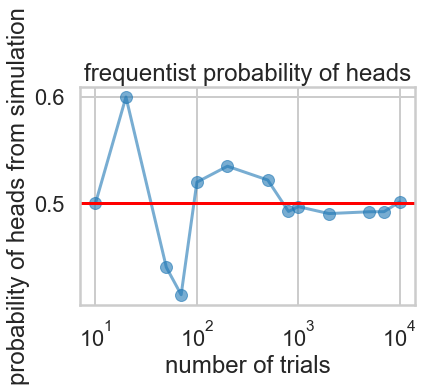

In [8]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

In [9]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [10]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)

In [12]:
result = simulate_election(predictwise, 10000)
print((result >= 269).sum())

9953


In [13]:
result

array([331, 323, 294, ..., 332, 325, 318], dtype=int64)

In [14]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

c:\users\gmin\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


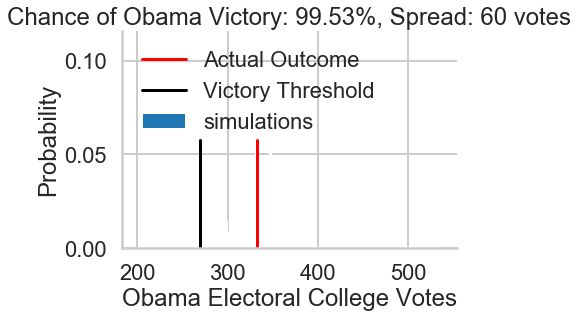

In [15]:
plot_simulation(result)

In [16]:
from scipy.stats import bernoulli
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

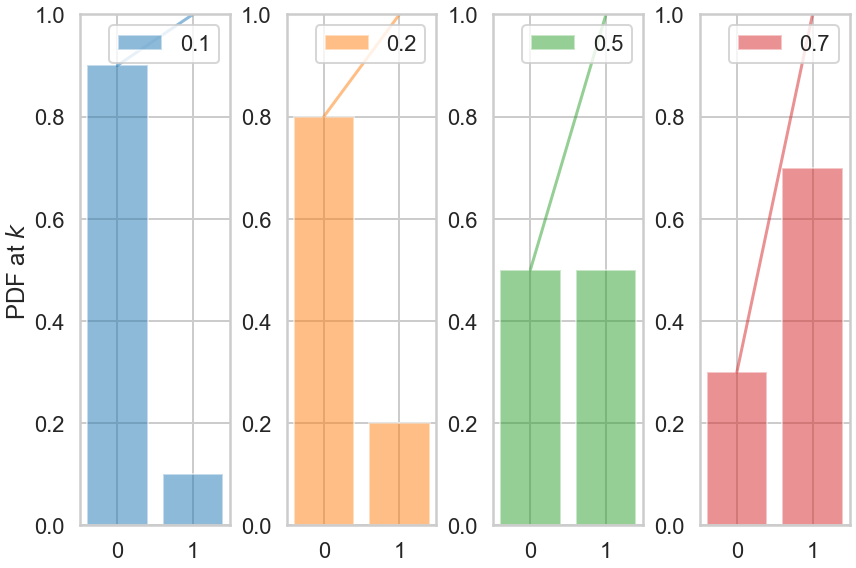

In [17]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

In [19]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1494
Obama Win CDF at votes= 320  is  0.4483
Obama Win CDF at votes= 340  is  0.8372
Obama Win CDF at votes= 360  is  0.9972
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


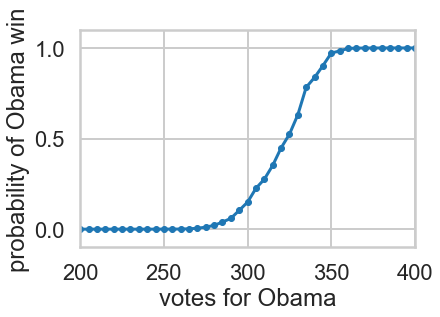

In [20]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

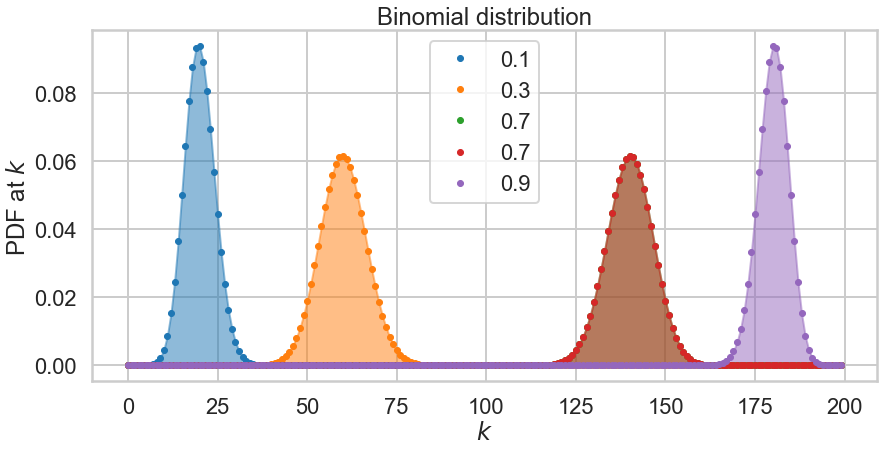

In [21]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")